### Z-점수 기반 이상치 탐치 실습

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats


##### 시계열 데이터 생성, 이상치 추가, 데이터 프레임 생성

In [9]:
#시계열 데이터 생성
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = np.random.rand(100) *10  #정규분포를 따르는 데이터 생성

#이상치 추가
values[20] = 50 #이상치 추가
values[40] = 60

#데이터 프레임 생성
data = pd.DataFrame({
    'Date' : dates,
    'Value' : values
})

print(data)

         Date     Value
0  2023-01-01  3.044434
1  2023-01-02  7.821741
2  2023-01-03  6.196717
3  2023-01-04  0.895898
4  2023-01-05  7.547057
..        ...       ...
95 2023-04-06  1.611799
96 2023-04-07  6.765362
97 2023-04-08  9.701143
98 2023-04-09  9.212350
99 2023-04-10  6.748312

[100 rows x 2 columns]


평균이 0이고 표준편차가 1인 표준 정규 분포를 따르는 100개의 난수를 생성합니다. 이후 각 난수에 10을 곱하여 데이터를 생성합니다. 따라서 values 는 평균이 0이고 표준편차가 10인 정규 분포를 따르는 데이터로 이루어진 배열입니다.

### 이상치 탐지

In [10]:
# z_score 계산
z_score = np.abs(stats.zscore(data['Value']))

#임계값 설정
threshold = 3

# z_score가 임계값을 초과하는지 확인
outliers = z_score > threshold

print(outliers)

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Name: Value, Length: 100, dtype: bool


outliers = z_scores > threshold: Z-score가 임계값을 초과하는지 확인하여 이상치를 판별합
니다. 이상치인 경우 해당 위치의 값은 True로 표시되며, 이상치가 아닌 경우 False로 표시됩니다.


### 시각화 및 이상치 값 확인

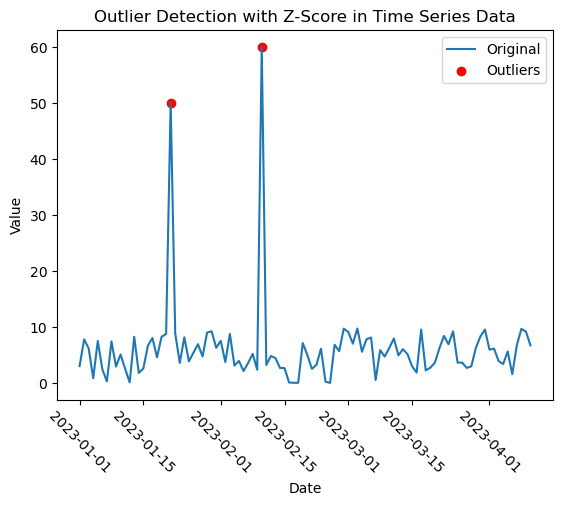

Detected Outliers:
20    50.0
40    60.0
Name: Value, dtype: float64


In [12]:
# 이상치 시각화 
plt.plot(data['Date'], data['Value'], label='Original')
plt.scatter(data[outliers]['Date'], data[outliers]['Value'], color='red', label='Outliers')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Outlier Detection with Z-Score in Time Series Data')
plt.legend()
plt.xticks(rotation=-45)
plt.show()

 

# 이상치 출력 
outlier_values = data[outliers]['Value']
print("Detected Outliers:")
print(outlier_values)